# Data Analysis - Hoteles

El objetivo de este notebook es llegar a responder las preguntas proporcionadas utilizando los datos disponibles en `hotusa_analysis.csv`.


### Importación de datos
Primero, necesitamos importar los datos a utilizar. Esto lo hacemos con el módulo `pandas`.
Por si acaso, comprobaremos que se pueda leer y lo mostramos por pantalla como modo de confirmación de que es el archivo que necesitamos.

In [44]:
import pandas as pd

# Especificamos la ruta del archivo CSV
dataset = pd.read_csv("./hotusa_analysis.csv")

# Hacemos una preview del archivo a modo de comprobación de que es el correcto
print(dataset.head())


   Unnamed: 0    res_id    date_gen date_checkin  nights  guests  ori_id  \
0           1  12423041  2021-12-17   2022-01-07       2       2      12   
1           2  12423225  2021-12-17   2022-01-07       2       2      12   
2           3  12423227  2021-12-17   2022-01-09       1       1      12   
3           4  12912535  2022-02-18   2022-02-19       1       2       4   
4           5  10194056  2020-09-16   2021-01-20       4       3       4   

    agency_id  mean_price_per_night     status  
0  Agencia_61                 52.50  Cancelled  
1  Agencia_61                 52.50  Cancelled  
2  Agencia_61                 50.10  Cancelled  
3  Agencia_52                  0.00  Confirmed  
4  Agencia_10                 60.69  Confirmed  


### Preparación de datos

- Hay registros en los que las reservas están hechas para 0 personas. La mayoría de estos tienen también un precio de 0, salvo un par de registros contados. Creo que es buena idea eliminarlos.

In [45]:
# Nos quedamos con los registros que tengan huéspedes.
dataset = dataset[dataset.guests >= 1]

### 1. Representa gráficamente el número de cancelaciones y reservas confirmadas para cada fecha de check in (date_checkin)

Primero mostraremos una gráfica de líneas para dar una visión más global, y luego, una de barras que detalle las reservas concretas para cada uno de los días:

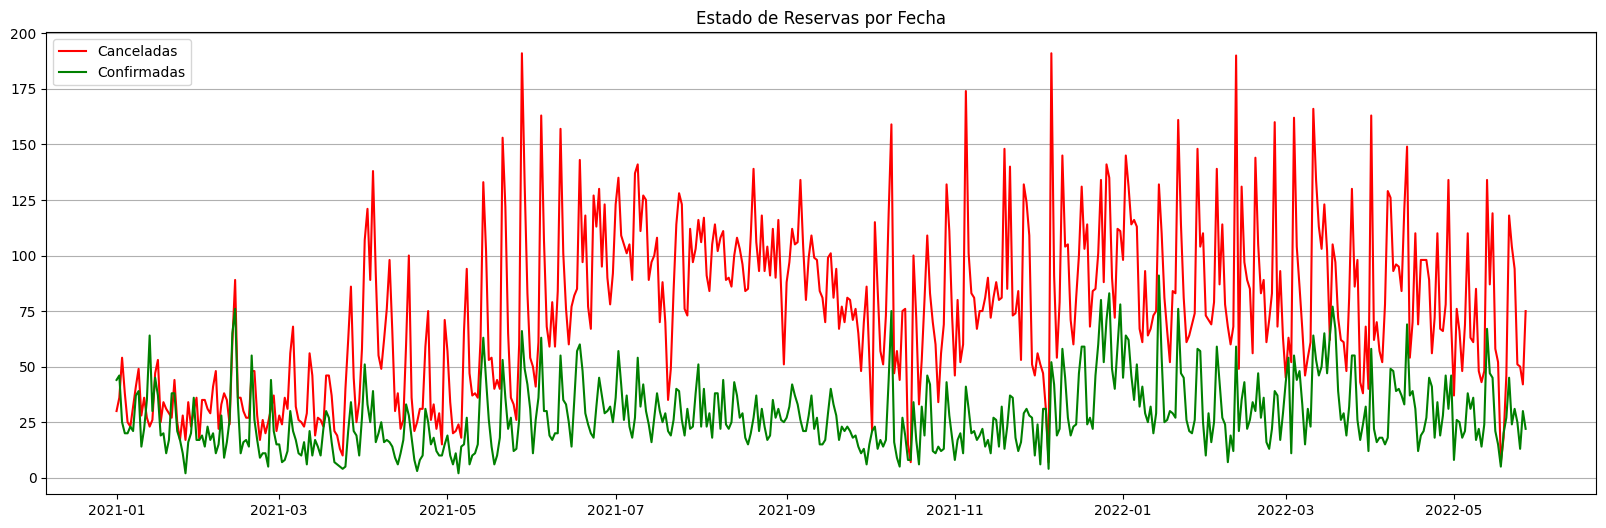

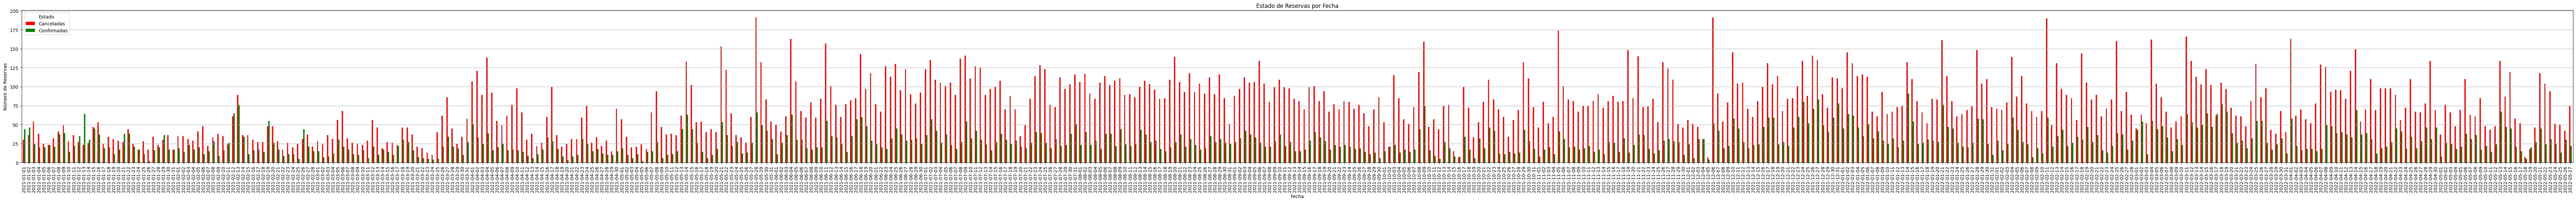

In [46]:
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

# Convertimos date_checkin a tipo fecha. El assert final le quita la hora.
dataset['date_checkin'] = pd.to_datetime(dataset['date_checkin']).dt.date

# Contamos el número de cancelaciones y reservas para cada fecha.
# Para esto, agrupamos por fecha y estado, y contamos el número de registros.
data = dataset.groupby(['date_checkin', 'status']).size().unstack(fill_value=0)

# Creamos la gráfica y ajustamos sus propiedades
fig, ax = plt.subplots(figsize=(20, 6)) # Ajustamos el área de la gráfica a representar para ver mejor las líneas.
data.plot(
    kind='line',
    color=['red', 'green'], # Ponemos en rojo las cancelaciones y en verde las reservas. Esto es complementario a las labels de la leyenda.
    figure=fig,
    ax=ax,
    )
plt.title('Estado de Reservas por Fecha')
plt.xlabel('')
plt.ylabel('')
plt.legend(labels=['Canceladas', 'Confirmadas'], loc='upper left') # Añadimos una leyenda para que se sepa qué color corresponde a qué estado.
plt.xticks(rotation=0) # Rotamos las fechas para que no se solapen.
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.
plt.show()

# Creamos la gráfica y ajustamos sus propiedades
fig, ax = plt.subplots(figsize=(100, 6)) # Ajustamos el área de la gráfica a representar y el eje para que seamos capaces de distinguir las fechas.
data.plot(
    kind='bar',
    stacked=False, # Ponemos las barras una al lado de la otra.
    figure=fig,
    ax=ax,
    color=['red', 'green'] # Ponemos en rojo las cancelaciones y en verde las reservas. Esto es complementario a las labels de la leyenda.
    )
plt.title('Estado de Reservas por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Reservas')
plt.legend(title='Estado', labels=['Canceladas', 'Confirmadas'], loc='upper left') # Añadimos una leyenda para que se sepa qué color corresponde a qué estado.
plt.xticks(rotation=90) # Rotamos las fechas para que no se solapen.
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.
plt.show()

### 2. Número de reservas confirmadas y cancelaciones para cada agencia (agengy_id). Selecciona únicamente el top 10 en cuanto a volumen total de reservas.

In [47]:
# Contamos el número de cancelaciones y reservas para cada agencia.
# Para esto, agrupamos por agencia y estado, y contamos el número de registros.
data = dataset.groupby(['agency_id', 'status']).size().unstack(fill_value=0)

# Sumamos el número de cancelaciones y reservas para cada agencia.
# axis=1 indica que queremos sumar por columnas (la de cancelaciones + la de reservas, como en el gráfico de arriba).
data['Total de Reservas'] = data.sum(axis=1)

# Ordenamos las agencias por el total de reservas.
data = data.sort_values(by='Total de Reservas', ascending=False).head(10)

print(data)

status      Cancelled  Confirmed  Total de Reservas
agency_id                                          
Agencia_1       17010       9452              26462
Agencia_2        8710       1674              10384
Agencia_4        4567        535               5102
Agencia_5        2439        609               3048
Agencia_6        1966        840               2806
Agencia_12       1535        478               2013
Agencia_3        1030        361               1391
Agencia_8         502        124                626
Agencia_7         241         33                274
Agencia_10         95        122                217


También podemos ponerlos en una gráfica para destacar más visualmente las agencias:

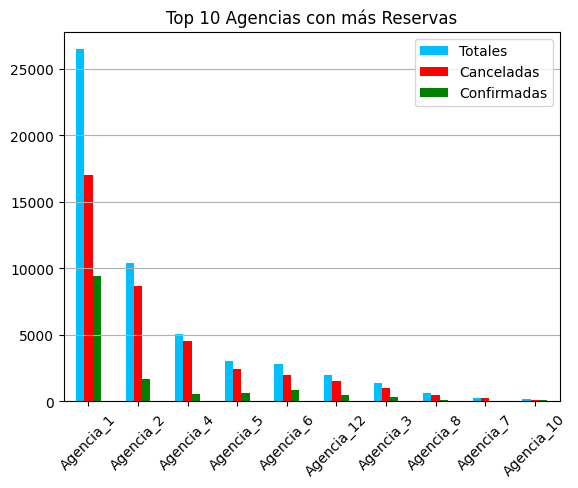

In [48]:
# Redefinimos el orden de las columnas (opcional, pero visualmente agradable).
orden_columnas = ["Total de Reservas","Cancelled","Confirmed"]
data = data.reindex(columns=orden_columnas)

# Creamos la gráfica y ajustamos sus propiedades
data.plot(
    kind='bar',
    stacked=False, # Ponemos las barras una al lado de la otra.
    color=['deepskyblue', 'red', 'green'] # Ponemos en azul el total, en rojo las cancelaciones y en verde las reservas. Complementario a las labels de la línea 12
    )
plt.title('Top 10 Agencias con más Reservas')
plt.legend(labels=['Totales', 'Canceladas', 'Confirmadas'])
plt.xlabel('') # Eliminamos el nombre del eje X, no es necesario para entender el gráfico.
plt.xticks(rotation=45) # Rotamos las fechas para que no se solapen.
plt.ylabel('') # Eliminamos el nombre del eje X, no es necesario para entender el gráfico.
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.
plt.show()

### 3. Evolución del precio mínimo, precio medio, precio máximo y revenue para cada fecha de check in (date_checkin)

- Preferiblemente representadas en la misma gráfica superpuestas, revenue puede ir según la escala.

> revenue = `mean_price_per_night` * `nights`

Esta vez, podemos haer un gráfico de líneas para representar esta información. 

El código es algo más complejo porque tenemos que separar los datos en dos escalas distintas (los valores de revenue son tan grandes que hacen que no se distingan los demás).

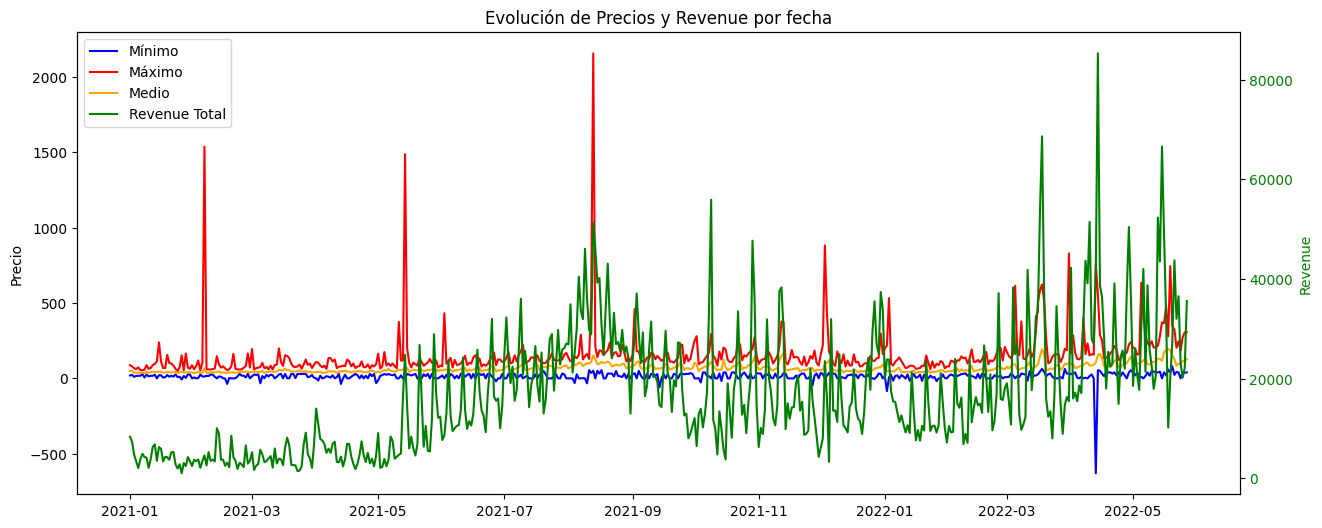

In [49]:
# Creamos una columna calculada para averiguar el revenue total por registro.
dataset['revenue'] = dataset['mean_price_per_night'] * dataset['nights']

# Agrupamos los datos por fecha y les añadimos el precio mínimo, máximo y medio, así como el revenue total.
data = dataset.groupby('date_checkin').agg({
    'mean_price_per_night': ['min', 'max', 'mean'],
    'revenue': 'sum'
    })

# Creamos la gráfica y ajustamos sus propiedades
fig, ax1 = plt.subplots(figsize=(15, 6)) # Ajustamos el área de la gráfica a representar.

# Añadimos a la gráfica las líneas de los precios mínimo, máximo y medio.
ax1.plot(data.index, data[('mean_price_per_night', 'min')], color='blue', label='Mínimo')
ax1.plot(data.index, data[('mean_price_per_night', 'max')], color='red', label='Máximo')
ax1.plot(data.index, data[('mean_price_per_night', 'mean')], color='orange', label='Medio')

# Indicamos que el eje Y de esta escala es el precio.
ax1.set_ylabel('Precio')

# Creamos una segunda escala para el revenue total.
ax2 = ax1.twinx() # Indicamos que comparte el mismo eje X que la escala anterior (ambas escalas comparten las fechas).
ax2.plot(data.index, data[('revenue', 'sum')], color='green', label='Revenue Total') # Añadimos a la gráfica la línea del revenue total.

# Coloreamos la nueva escala para identificarla sin problemas.
ax2.set_ylabel('Revenue', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadimos las leyendas de ambas escalas.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Añadimos un título a la gráfica y la mostramos.
plt.title('Evolución de Precios y Revenue por fecha')
plt.show()

- Se puede extraer alguna conclusión al comparar la evolución entre los precios y el revenue. ¿Hay fechas mal vendidas?

> **Conclusión 1** 
>
> Parece que el revenue de antes de mayo de 2021 es peor que cuando lo comparamos con el revenue de 2022 para las mismas fechas.
>
> Por ejemplo, de marzo a abril de 2022, el revenue es significativamente mayor que en 2021. Esto quiere decir que estas fechas de 2021 no se han vendido con todo el potencial que se podría haber sacado.

> **Conclusión 2**
>
> Podemos ver que los precios a partir de enero de 2022 van aumentando, pero también los ingresos. De hecho, el revenue en mayo de 2022 es parecido al período de verano del año pasado (!!!).
>
> Como podemos suponer que la gente utiliza más los hoteles en sus vacaciones de verano, seguramente desde el verano de 2021 para atrás hayan sido fechas poco aprovechadas.

Sería curioso tener un histórico del verano de 2022 para hacer más comparaciones...

### 4. Las reservas entran con una antelación. El objetivo de esta pregunta es observar como afecta la antelación a la cancelación y confirmación de las reservas.

- Si es posible agrupa las antelaciones en intervalos: [0,3), [3,7), [7,30), [30,90), [90,120] días

> Antelación = `date_checkin` - `date_gen`

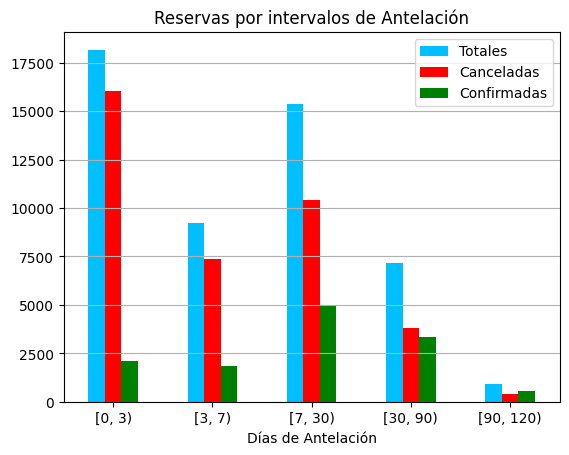

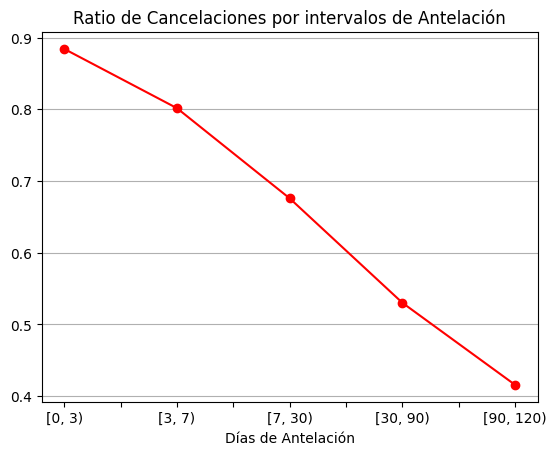

In [50]:
# Convertimos la columna date_gen a tipo fecha. El assert final le quita la hora.
dataset['date_gen'] = pd.to_datetime(dataset['date_gen']).dt.date

# Calculamos la antelación (diferencia en días). Ojo al dt.days al final, en el que los datos son días.
dataset['antelacion'] = (dataset['date_checkin'] - dataset['date_gen']).dt.days

# Definimos los intervalos
intervalos = pd.cut(dataset['antelacion'], bins=[0, 3, 7, 30, 90, 120], right=False)

# Agrupamos los datos por los intervalos y el estado de reserva y calculamos el número de registros.
data = dataset.groupby([intervalos, 'status']).size().unstack(fill_value=0)

# Sumamos el número de cancelaciones y reservas para cada intervalo.
data['Total de Reservas'] = data.sum(axis=1)

# Redefinimos el orden de las columnas (opcional, pero visualmente agradable).
orden_columnas = ["Total de Reservas","Cancelled","Confirmed"]
data = data.reindex(columns=orden_columnas)

# Creamos la gráfica y ajustamos sus propiedades
data.plot(
    kind='bar',
    stacked=False, # Ponemos las barras una al lado de la otra.
    color=['deepskyblue', 'red', 'green'] # Ponemos en azul el total, en rojo las cancelaciones y en verde las reservas. Complementario a las labels de la línea 27
    )
plt.title('Reservas por intervalos de Antelación')
plt.legend(labels=['Totales', 'Canceladas', 'Confirmadas'])
plt.xlabel('Días de Antelación')
plt.xticks(rotation=0)
plt.ylabel('') # No mostramos nombre del eje Y, no es necesario para entender el gráfico.
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.

plt.show()

data['ratio'] = data['Cancelled'] / data['Total de Reservas']

data['ratio'].plot(
    kind='line',
    color='red',
    marker='o'
    )
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.
plt.title('Ratio de Cancelaciones por intervalos de Antelación')
plt.xlabel('Días de Antelación')
plt.show()

> NOTA: Idealmente ambas gráficas se podrían juntar en una con dos escalas (como el ejemplo anterior)

- ¿Cuándo suelen entrar las reservas?

> Los intervalos más frecuentes están en los 0-3 días de antelación y los 7-30 días.

- ¿el ratio de cancelación es constante para diferentes antelaciones?

> Podemos comprobar que no. A mayor antelación, menos reservas se cancelan.


### 5. Elabora 2 análisis por tu parte

> Algunas sugerencias: Diferencias entre precio de venta de reservas canceladas y confirmadas, cómo afecta el número de noches al precio medio de la reserva, ratio de cancelación por origen (origen_id), evolución del precio de venta por mes, qué considerarías outliers...

**Análisis 1**: Huéspedes: ¿Qué número hace el mayor número de reservas? ¿Afecta el número de huéspedes a las cancelaciones?

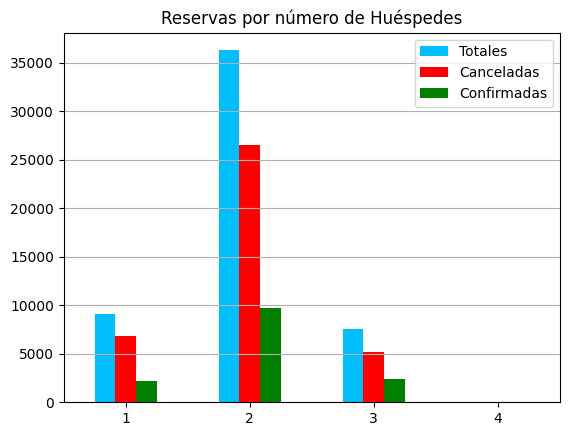

In [51]:
# Agrupamos los datos por huéspedes y por el estado de reserva y calculamos el número de registros.
data = dataset.groupby(['guests', 'status']).size().unstack(fill_value=0)

# Calculamos el total de reservas para cada número de huéspedes.
data['Total de Reservas'] = data.sum(axis=1)

# Redefinimos el orden de las columnas (opcional, pero visualmente agradable).
orden_columnas = ["Total de Reservas", "Cancelled", "Confirmed"]
data = data.reindex(columns=orden_columnas)

# Creamos la gráfica y ajustamos sus propiedades
data.plot(
    kind='bar',
    stacked=False, # Ponemos las barras una al lado de la otra.
    color=['deepskyblue', 'red', 'green'] # Ponemos en azul el total, en rojo las cancelaciones y en verde las reservas. Complementario a las labels de la línea 27
    )
plt.title('Reservas por número de Huéspedes')
plt.legend(labels=['Totales', 'Canceladas', 'Confirmadas'])
plt.xlabel('') # No mostramos nombre del eje X, no es necesario para entender el gráfico.
plt.xticks(rotation=0)
plt.ylabel('') # No mostramos nombre del eje Y, no es necesario para entender el gráfico.
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.

plt.show()

> Las reservas se concentran en los 2 huéspedes, siendo más de 3 veces más que cualquier otro número. Sin embargo, vemos que la proporción de cancelaciones es similar para cualquier número de huéspedes, por lo que seguramente la razón de las cancelaciones no tenga que ver con el número de huéspedes.

**Análisis 2**: ¿Cómo afecta el precio de venta a las cancelaciones?

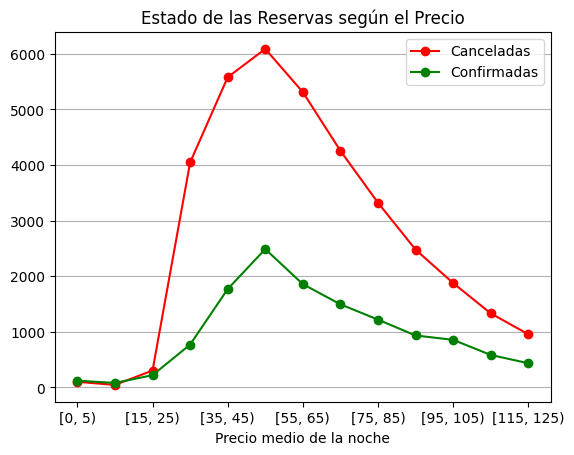

In [52]:
# Definimos los intervalos sobre los que vamos a agrupar los precios.
intervalos = pd.cut(dataset['mean_price_per_night'], bins=[0, 5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125], right=False)

# Agrupamos los datos por los intervalos y el estado de reserva y calculamos el número de registros.
data = dataset.groupby([intervalos, 'status']).size().unstack(fill_value=0)

# Creamos la gráfica y ajustamos sus propiedades
data.plot(
    kind='line',
    marker='o',
    color=['red', 'green'], # Ponemos en azul el total, en rojo las cancelaciones y en verde las reservas. Complementario a las labels de la línea 27
    )
plt.title('Estado de las Reservas según el Precio')
plt.legend(labels=['Canceladas', 'Confirmadas'])
plt.xlabel('Precio medio de la noche')
plt.xticks(rotation=0)
plt.ylabel('') # No mostramos nombre del eje Y, no es necesario para entender el gráfico.
plt.grid(axis='y') # Añadimos una rejilla en el eje Y para que sea más fácil leer los valores.

plt.show()

> A partir de los 20€ las cancelaciones se disparan, multiplicando en cantidad a las reservas más baratas. El salto tan grande en este punto se puede deber a las ofertas en habitaciones, en las que los clientes las aprovechan sin saber al 100% si van a ir.
>
> El ratio se mantiene el resto de la gráfica en adelante, por lo que se puede entender que el precio de la reserva en estos casos no es un factor prioritario de cancelación.